# Examples of the eigenbasis construction

Copyright 2018-2019 Manon Kok and Arno Solin

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


In [4]:
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage
from DGP.domain import gp_domain
from matplotlib import pyplot as plt
%matplotlib inline

# Read domain
im = mpimg.imread('star.png')

# Resize
im = scipy.ndimage.zoom(im, 0.3125, order=2)

# Convert to mask
foo = np.amax(im[:,:,:2],2)<0.5

# Pad boundary
mask = np.zeros((foo.shape[0]+2,foo.shape[1]+2),dtype=bool)
mask[1:-1,1:-1] = foo

# Number of basis functions
ms = 32

# Make domain (takes a while)
domain = gp_domain(mask,(0,1),(0,1),ms)

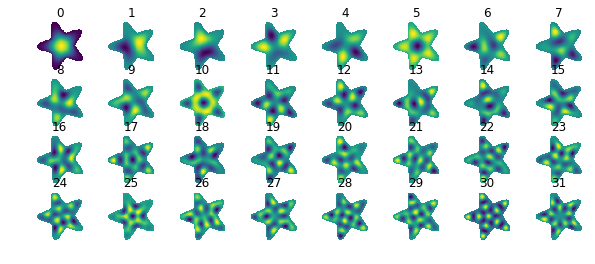

In [12]:
# Test points
X1, X2 = np.mgrid[0:1:100j, 0:1:100j]
XT = np.vstack((X1.flatten(), X2.flatten())).T

# Evaluate basis functions at test inputs
V = domain.eigenfun(XT)

# Visualize the basis functions (color scale arbitrary)
fig, axs = plt.subplots(4,8, figsize=(10, 4))
axs = axs.ravel()
for j in range(ms):
    ind = V[:,j]==0
    V[ind,j]=float('NaN')
    axs[j].pcolormesh(X1, X2, V[:,j].reshape(100, 100))
    axs[j].set_title(str(j))
    axs[j].axis('equal')
    axs[j].axis('off')